## Примеры лабораторной работы

In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [44]:
img = cv2.imread('ks.jpg', 0)

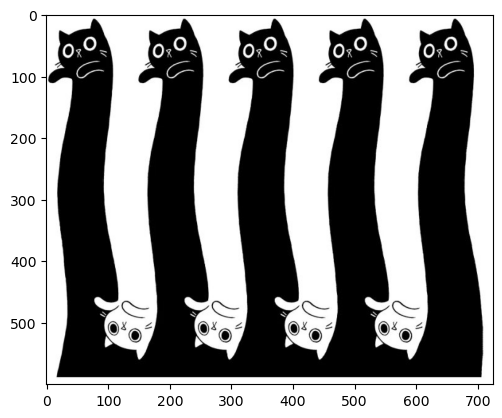

In [48]:
plt.imshow(img)

In [ ]:
ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]

3.1.1. Площадь, ограниченная контуром

In [6]:
area = cv2.contourArea(cnt)
area

1089708.0

3.1.2. Длина контурного периметра


In [7]:
cv2.arcLength(cnt, 1)

4262.0

3.1.3. Моменты


In [8]:
cv2.moments(cnt)

{'m00': 1089708.0,
 'm10': 696868266.0,
 'm01': 464215608.0,
 'm20': 594196341476.0,
 'm11': 296865881316.0,
 'm02': 263674465344.0,
 'm30': 569982840560853.0,
 'm21': 253127641468776.0,
 'm12': 168619820587488.0,
 'm03': 168487983354816.0,
 'mu20': 148549085369.0,
 'mu11': 0.0,
 'mu02': 65918616336.0,
 'mu30': 0.0,
 'mu21': 0.0,
 'mu12': 0.0,
 'mu03': 0.0,
 'nu20': 0.12509780907668233,
 'nu11': 0.0,
 'nu02': 0.05551211884284597,
 'nu30': 0.0,
 'nu21': 0.0,
 'nu12': 0.0,
 'nu03': 0.0}

3.1.4. Отношение ширины к высоте ограничивающего прямоугольника


In [9]:
x, y, w, h = cv2.boundingRect(cnt)
float(w)/h

1.5005861664712778

3.1.5. Отношение площади контура к площади ограничивающего прямоугольника


In [10]:
arr = w * h
ar = cv2.contourArea(cnt)
extent = float(arr) / ar
extent

1.0019564874259894

3.1.6. Эквивалентный диаметр


In [11]:
ar = cv2.contourArea(cnt)
eqdiam = np.sqrt(4*ar / np.pi)
eqdiam

1177.9046301862747

#### Задание 3.1.
Вычислить площадь s, периметр р, ширину w, высоту h, отношение ширины к высоте w/h, отношение площади изображения к площади описывающего прямоугольника s/(wh), эквивалентный диаметр, центр масс, моменты бинарного изображения.

In [12]:
img = cv2.imread('ks.jpg', 0)
imag = cv2.imread('ks.jpg', 0)

In [13]:
ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]

In [14]:
ar = cv2.contourArea(cnt)
print(ar)

1089708.0


In [15]:
prm = cv2.arcLength(cnt, 1)
print(prm)

4262.0


In [16]:
M = cv2.moments(cnt)
print(M)

{'m00': 1089708.0, 'm10': 696868266.0, 'm01': 464215608.0, 'm20': 594196341476.0, 'm11': 296865881316.0, 'm02': 263674465344.0, 'm30': 569982840560853.0, 'm21': 253127641468776.0, 'm12': 168619820587488.0, 'm03': 168487983354816.0, 'mu20': 148549085369.0, 'mu11': 0.0, 'mu02': 65918616336.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.12509780907668233, 'nu11': 0.0, 'nu02': 0.05551211884284597, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


In [17]:
x, y, w, h = cv2.boundingRect(cnt)
print(x, y, w, h)

0 0 1280 853


In [18]:
imag = cv2.rectangle(imag, (x, y), (x+w, y+h), (0, 255, 0), 2)
cv2.imshow('Rectan', imag)

In [ ]:
asprat = float(w) / h
rectar = w * h
extent = float(ar) / rectar
eqdiam = np.sqrt(4*ar / np.pi)

print(asprat, extent)
print(eqdiam)
cv2.waitKey(0)

1.5005861664712778 0.9980473329425557
1177.9046301862747


3.2.1. Маска и пиксельные точки


In [ ]:
img = cv2.imread("ks.jpg", 0)
mask = np.zeros(img.shape, np.uint8)

cv2.drawContours(mask, [cnt], 0, 255, -1)
pixpoints = np.transpose(np.nonzero(mask))
pixpoints = cv2.findNonZero(mask)

3.2.2. Максимальное и минимальное значения и их координаты


In [ ]:
minval, maxval, minloc, maxloc = cv2.minMaxLoc(img, mask=mask)
print(minval, maxval, minloc, maxloc)

3.2.3. Крайние точки


In [ ]:
eftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
print(leftmost, rightmost, topmost, bottommost)

3.2.4. Средняя интенсивность


In [ ]:
mean_val = cv2.mean(img, mask=mask)
mean_val

3.2.5. Ориентация


In [ ]:
mg = cv2.imread('ks.jpg', 0)

In [ ]:
ret,thresh = cv2.threshold(img,0,255,0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]

In [ ]:
(x, y), (MA, ma), ang = cv2.fitEllipse(cnt)
print(ang)

#### Задание 3.2.
Используя изображение маски определить крайние точки, минимальное и максимальное значения и их координаты для бинарного изображения. Найти среднюю интенсивность изображения в градациях серого, ориентацию бинарного изображения с выделенной осью.

In [ ]:
img = cv2.imread('ks.jpg', 0)


In [ ]:
ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]

In [ ]:
mask = np.zeros(img.shape, np.uint8)
cv2.drawContours(mask, [cnt], 0, 255, -1)
pixpoin = np.transpose(np.nonzero(mask))
minv, maxv, minl, maxl = cv2.minMaxLoc(img, mask=mask)

In [ ]:
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])

In [ ]:
(x,y),(MA,ma),ang=cv2.fitEllipse(cnt)

meanv = cv2.mean(img,mask = mask)

In [ ]:
print(pixpoin)
print(minv, maxv, minl, maxl)
print(leftmost, rightmost, topmost, bottommost)
print(meanv)
print(ang)
cv2.waitKey(0)